What needs to be done:
- cross validation (K-folds,...)
- Outlier removal
- Feature selection - RFE, Lasso...
- Convert String Variables into float (One hot encoder?)
- Normalization
- MORE THINGS
- models
-- review correlations (numerical variables treatment)

In [1355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

import scipy.stats as stats
from scipy.stats import chi2_contingency

import seaborn as sns

from datetime import date

import warnings
warnings.filterwarnings("ignore")

In [1314]:
train_demo=pd.read_excel('train_demo.xlsx')
train_habits=pd.read_excel('train_habits.xlsx')
train_health=pd.read_excel('train_health.xlsx')

In [1315]:
print(train_demo.shape)
print(train_habits.shape)
print(train_health.shape)

(800, 6)
(800, 6)
(800, 9)


In [1316]:
train_df = train_demo.merge(train_habits, on = 'PatientID').merge(train_health, on = 'PatientID')
train_df.head(3)

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [1317]:
train_df.set_index('PatientID', inplace=True)

In [1318]:
train_df.sort_index(axis=0, inplace=True)

In [1319]:
train_df.head(3)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1001,Mr. Charles Bolek,1969,East of England,High School Graduate,0,Yes,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,174,54,207,140,19,15,Not sure,Neither I nor my immediate family have diabetes.
1003,Mr. Boyd Cook,1961,Yorkshire and the Humber,High School Graduate,0,No,I usually consume alcohol every day,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,173,76,207,148,20,0,Not sure,Neither I nor my immediate family have diabetes.
1004,Mrs. Maggie Jones,1960,London,University Complete (3 or more years),0,Yes,I usually consume alcohol every day,No,5 to 6 pieces of fruit in average,Between one liter and two liters,155,59,298,138,8,9,More than 3 years,Neither I nor my immediate family have diabetes.


In [1320]:
train_df.value_counts('Disease')

Disease
1    411
0    389
dtype: int64

<a class="anchor" id="4th-bullet">


###  Create Column Gender

</a>

In [1321]:
train_df['Gender'] = train_df.apply(lambda row: 'Male' if row['Name'].startswith('Mr.') else 'Female', axis=1)

In [1322]:
#Checking if it's right
train_df[['Name','Gender']]

,Name,Gender
PatientID,,
1001,Mr. Charles Bolek,Male
1003,Mr. Boyd Cook,Male
1004,Mrs. Maggie Jones,Female
1005,Mrs. Hazel Eison,Female
1006,Mr. Luis Pham,Male
...,...,...
2019,Mr. William Hurd,Male
2020,Mr. Jim Garrett,Male
2022,Mr. Barry Holman,Male


In [1323]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1001 to 2024
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

<a class="anchor" id="4th-bullet">


###  Fill Missing on Train

</a>

In [1324]:
train_df['Education'].fillna('Unknown', inplace = True)
train_df[train_df['Education']=='Unknown'].head(3)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Gender
PatientID,,,,,,,,,,,,,,,,,,,
1048,Mrs. Margaret Wysong,1956,East Midlands,Unknown,1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,166,67,282,146,18,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,Female
1072,Mr. Steven Fisher,1866,East Midlands,Unknown,0,Yes,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,Between one liter and two liters,171,62,253,125,16,5,More than 3 years,Neither I nor my immediate family have diabetes.,Male
1085,Mr. Robert Swenson,1978,South West,Unknown,1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,165,72,224,120,22,0,More than 3 years,I do have diabetes,Male


In [1325]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1001 to 2024
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         800 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [1326]:
#Check for any kind of mistakes (some rows having disease with other value)
train_df['Disease'].unique()

array([0, 1], dtype=int64)

In [1327]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.0,1.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.0,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0


<a class="anchor" id="4th-bullet">


###  Target Variable

</a>

In [1328]:
train_data = train_df.drop('Disease', axis=1).copy()
train_target = train_df['Disease'].copy()

<a class="anchor" id="4th-bullet">


###  Split numeric and categorical

</a>

In [1329]:
##VER SE AS VARIAVEIS COM 0 E 1 SAO NUMERICAS OU CATEGORICAS
train_data_num = train_data.select_dtypes(include=np.number).set_index(train_data.index).copy()
train_data_cat = train_data.select_dtypes(exclude=np.number).set_index(train_data.index).copy()

<a class="anchor" id="4th-bullet">


###  Outliers

</a>

In [1330]:
train_data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.0,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0


<a class="anchor" id="4th-bullet">


##### 1st method

</a>

In [1331]:
filters1 = (
    (train_data_num['Birth_Year']>=1940)
    &
    (train_data_num['Weight']>=45)
    &
    (train_data_num['High_Cholesterol']<=350)
    &
    (train_data_num['Blood_Pressure']>=96)
    &
    (train_data_num['Blood_Pressure']<=180)
    &
    (train_data_num['Physical_Health']<=20)
)

df_1 = train_data_num[filters1]
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.9412


In [1332]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,753.0,1967.701195,9.098440,1945.0,1961.0,1966.0,1975.0,1993.0
Height,753.0,168.037185,7.864964,151.0,162.0,171.0,174.0,180.0
Weight,753.0,68.339973,11.841089,45.0,59.0,68.0,77.0,97.0
High_Cholesterol,753.0,245.029216,44.031048,130.0,212.0,243.0,277.0,346.0
Blood_Pressure,753.0,130.749004,16.124415,100.0,120.0,130.0,140.0,180.0
Mental_Health,753.0,17.297477,5.431802,0.0,13.0,18.0,21.0,29.0
Physical_Health,753.0,4.266932,5.003635,0.0,0.0,2.0,7.0,20.0


In [1333]:
#Number of records
df_1.shape[0]

753

<a class="anchor" id="4th-bullet">


##### 2nd Method - IQR

</a>

In [1334]:
metric_features = train_data_num.columns.to_list()
q25 = train_data_num.quantile(.25)
q75 = train_data_num.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(train_data_num[metric].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0))
df_2=train_data_num.copy()
df_2['filters2'] = filters2.to_list()
df_2=df_2[df_2['filters2']!=False]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.9225


<a class="anchor" id="4th-bullet">


##### Combining both methods

</a>

In [1335]:
df_3 = train_data_num.copy()
df_3['filters1'] = filters1.to_list()
df_3['filters2'] = filters2.to_list()
# index_to_drop=df_3[(df_3['filters1']==False) | (df_3['filters2']==False)].index
df_3 = df_3[(df_3['filters1']==True) | (df_3['filters2']==True)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.9575


<a class="anchor" id="4th-bullet">


##### Remove from train_data_cat and train_target all records removed on train_data_num
##### Drop from train_data_num columns filters1 and filters2
</a>

In [1336]:
#Eliminar do train_data_cat os que nao estavam no train_data_num
train_data_num=df_3.copy()
train_data_cat=train_data_cat[train_data_cat.index.isin(train_data_num.index)]
train_target=train_target[train_target.index.isin(train_data_num.index)]
train_data_num.drop(['filters1', 'filters2'], axis=1, inplace=True)


<a class="anchor" id="4th-bullet">


###  Convert yes/no to 1/0
Exercise and smoking habits

</a>

In [1337]:
train_data_cat['Smoking_Habit']=pd.Series(np.where(train_data_cat.Smoking_Habit.values == 'Yes', 1, 0),train_data_cat.index)
train_data_cat['Exercise']=pd.Series(np.where(train_data_cat.Exercise.values == 'Yes', 1, 0),train_data_cat.index)

<a class="anchor" id="4th-bullet">


###  Convert birth year to age

</a>

In [1338]:
def age(birthdate):
    year = date.today().year
    age = year - birthdate 
    return age

In [1339]:
train_data_num['Birth_Year'] = train_data_num['Birth_Year'].apply(lambda x: age(x))
train_data_num.rename(columns = {'Birth_Year':'Age'}, inplace=True)

In [1340]:
train_data_num.head(3)

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1001,53,174,54,207,140,19,15
1003,61,173,76,207,148,20,0
1004,62,155,59,298,138,8,9


<a class="anchor" id="4th-bullet">


###  Scaler

</a>

In [1341]:
scaler = MinMaxScaler().fit(train_data_num)
train_data_num_scaled = scaler.transform(train_data_num)
train_data_num_scaled = pd.DataFrame(train_data_num_scaled, columns = train_data_num.columns).set_index(train_data_num.index)
train_data_num_scaled.head(3)

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1001,0.500000,0.793103,0.232143,0.337719,0.534884,0.655172,0.75
1003,0.666667,0.758621,0.625000,0.337719,0.627907,0.689655,0.00
1004,0.687500,0.137931,0.321429,0.736842,0.511628,0.275862,0.45


In [1342]:
train_data_num_scaled.var()

Age                 0.035633
Height              0.074751
Weight              0.045623
High_Cholesterol    0.038831
Blood_Pressure      0.035446
Mental_Health       0.034856
Physical_Health     0.061986
dtype: float64

In [1343]:
train_data_scaled=train_data_num_scaled.join(train_target)
train_data_scaled.head(3)

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Disease
PatientID,,,,,,,,
1001,0.500000,0.793103,0.232143,0.337719,0.534884,0.655172,0.75,0
1003,0.666667,0.758621,0.625000,0.337719,0.627907,0.689655,0.00,0
1004,0.687500,0.137931,0.321429,0.736842,0.511628,0.275862,0.45,0


<a class="anchor" id="4th-bullet">


###  PEARSON

</a>

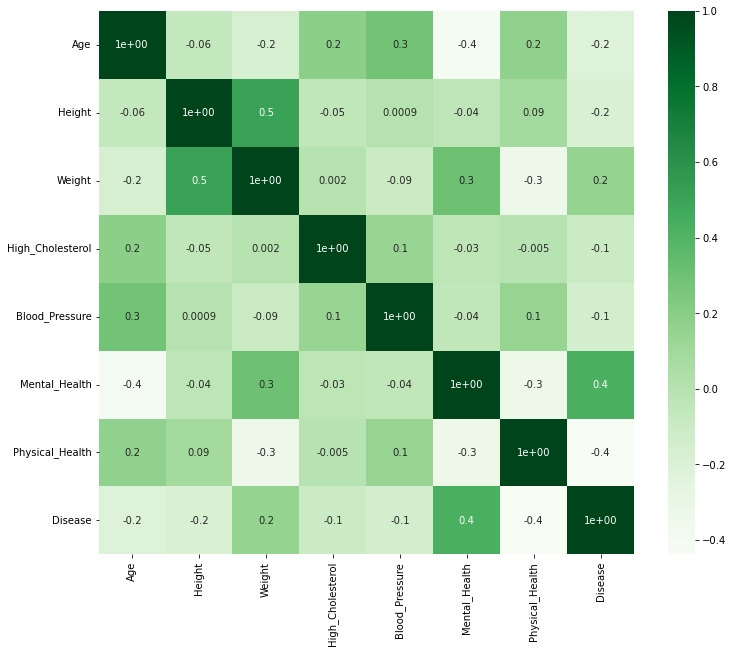

In [1344]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1')
    plt.show()
cor_pearson = train_data_scaled.corr()
cor_heatmap(cor_pearson)

In [1345]:
def Test_Independence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [1346]:
for var in train_data_cat:
    Test_Independence(train_data_cat[var],train_target, var)

Name is NOT an important predictor. (Discard Name from model)
Region is NOT an important predictor. (Discard Region from model)
Education is NOT an important predictor. (Discard Education from model)
Smoking_Habit is NOT an important predictor. (Discard Smoking_Habit from model)
Drinking_Habit is IMPORTANT for Prediction
Exercise is IMPORTANT for Prediction
Fruit_Habit is IMPORTANT for Prediction
Water_Habit is NOT an important predictor. (Discard Water_Habit from model)
Checkup is IMPORTANT for Prediction
Diabetes is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction


In [1347]:
train_data_cat.drop(['Name', 'Region', 'Education', 'Smoking_Habit', 'Water_Habit'],axis=1, inplace=True)

<a class="anchor" id="4th-bullet">


###  Checking and changing unique values

</a>

In [1388]:
#create function to generate countplot based on the feature we want to see plotted
def countplot(feature):
    #Themes
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    #create coutplot
    ctplot=sns.countplot(data=train_data_cat, x=feature, dodge=False, hue=feature)
    ctplot.set(xticklabels=[])
    #legend's position
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.figure(figsize=(8,4))
    plt.show()



<a class="anchor" id="4th-bullet">


##### Drinking Habit

</a>

In [1379]:
train_data_cat['Drinking_Habit'].unique()

array(['I consider myself a social drinker',
       'I usually consume alcohol every day',
       'I do not consume any type of alcohol'], dtype=object)

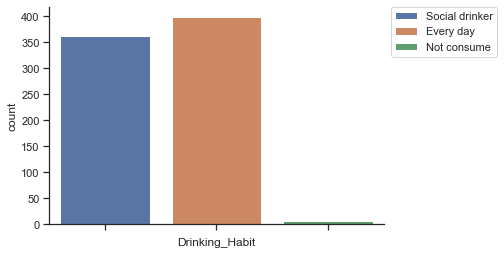

<Figure size 576x288 with 0 Axes>

In [1387]:
countplot('Drinking_Habit')

In [1380]:
#Rename to shorter values
dict_drinking_habit = {"I consider myself a social drinker" : 'Social drinker',  'I usually consume alcohol every day' : 'Every day', "I do not consume any type of alcohol": 'Not consume'}
train_data_cat.replace({"Drinking_Habit": dict_drinking_habit}, inplace=True)

<a class="anchor" id="4th-bullet">


##### Fruit Habit

</a>

In [1381]:
train_data_cat['Fruit_Habit'].unique()

array(['Less than 1. I do not consume fruits every day.',
       '1 to 2 pieces of fruit in average',
       '5 to 6 pieces of fruit in average',
       '3 to 4 pieces of fruit in average',
       'More than six pieces of fruit'], dtype=object)

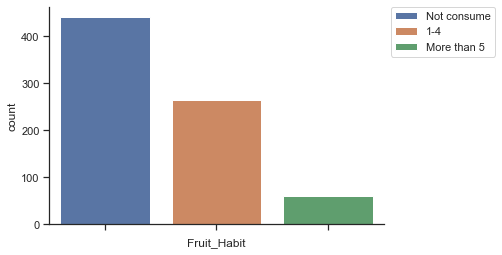

<Figure size 576x288 with 0 Axes>

In [1389]:
countplot('Fruit_Habit')

In [1383]:
#Shortening value
train_data_cat["Fruit_Habit"].replace('Less than 1. I do not consume fruits every day.', 'Not consume', inplace=True)
#Aggregate values on fruit_habit
###Aggregate 1 to 4 pieces of fruit
train_data_cat["Fruit_Habit"].replace(['1 to 2 pieces of fruit in average', '3 to 4 pieces of fruit in average'], '1-4', inplace=True)
###Aggregate 5 or more pieces of fruit
train_data_cat["Fruit_Habit"].replace(['5 to 6 pieces of fruit in average', 'More than six pieces of fruit'], 'More than 5', inplace=True)

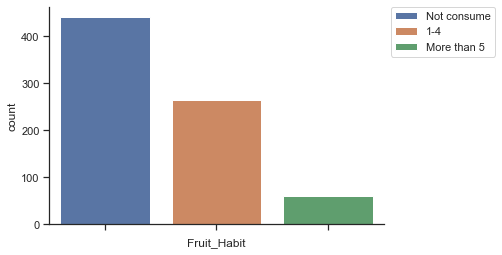

<Figure size 576x288 with 0 Axes>

In [1391]:
##Checking with the aggregation done
countplot('Fruit_Habit')

<a class="anchor" id="4th-bullet">


##### Checkup

</a>

In [1294]:
train_data_cat['Checkup'].unique()

array(['Not sure', 'More than 3 years', 'Less than three months',
       'Less than 3 years but more than 1 year'], dtype=object)

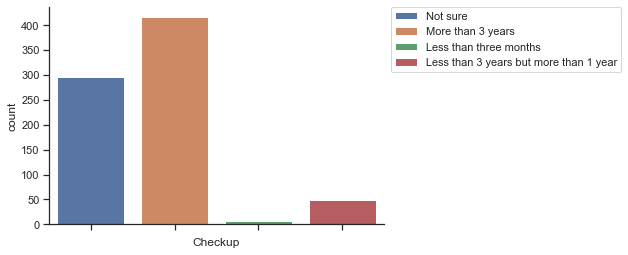

<Figure size 576x288 with 0 Axes>

In [1392]:
countplot('Checkup')

In [1393]:
#Shortening values
dict_checkup = {"Less than 3 years but more than 1 year" : '1-3 years',  'Less than three months' : 'Less than 3 months'}
train_data_cat.replace({"Checkup": dict_checkup}, inplace=True)

<a class="anchor" id="4th-bullet">


##### Diabetes

</a>

In [1395]:
train_data_cat['Diabetes'].unique()

array(['Neither I nor my immediate family have diabetes.',
       'I do have diabetes',
       'I have/had pregnancy diabetes or borderline diabetes',
       "I don't have diabetes, but I have direct family members who have diabetes."],
      dtype=object)

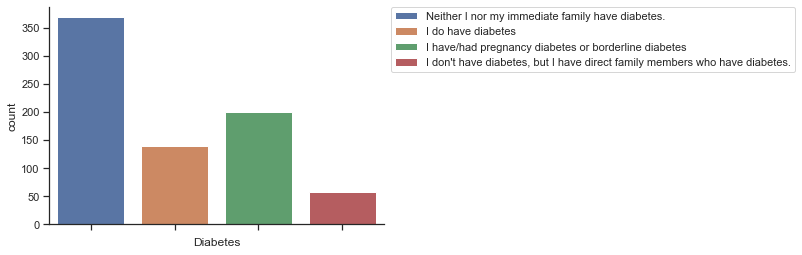

<Figure size 576x288 with 0 Axes>

In [1396]:
countplot('Diabetes')

In [1397]:
##Aggregate to create 'No' value
train_data_cat["Diabetes"].replace(['Neither I nor my immediate family have diabetes.', "I don't have diabetes, but I have direct family members who have diabetes."], 'No', inplace=True)
#Shorter values
dict_diabetes = {"I do have diabetes" : 'Yes',  'I have/had pregnancy diabetes or borderline diabetes' : 'Pregnancy or Borderline Diabetes'}
train_data_cat.replace({"Diabetes": dict_diabetes}, inplace=True)

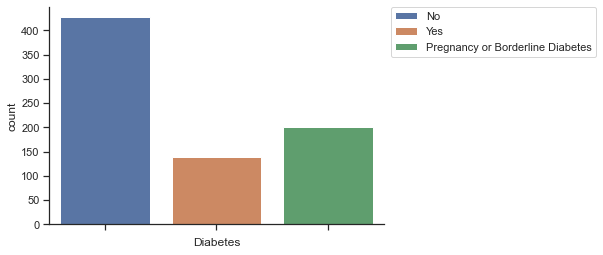

<Figure size 576x288 with 0 Axes>

In [1399]:
##Check aggregated distribution
countplot('Diabetes')

<a class="anchor" id="4th-bullet">


##### Gender

</a>

In [1400]:
#Change gender to 'Gender Male' in order to have 0/1 values
train_data_cat['Gender'].replace(['Male'], 1, inplace=True)
train_data_cat['Gender'].replace(['Female'], 0, inplace=True)
train_data_cat.rename(columns={'Gender':'Gender Male'}, inplace=True)

In [1401]:
train_data_cat.sample(5)

,Drinking_Habit,Exercise,Fruit_Habit,Checkup,Diabetes,Gender Male
PatientID,,,,,,
1112,Social drinker,1,1-4,Not sure,No,1
1048,Social drinker,0,1-4,More than 3 years,Pregnancy or Borderline Diabetes,0
1429,Every day,0,Not consume,More than 3 years,Pregnancy or Borderline Diabetes,1
1401,Every day,0,Not consume,More than 3 years,No,0
1469,Social drinker,1,More than 5,More than 3 years,No,1


<a class="anchor" id="4th-bullet">


###  One hot encoder

</a>

In [1300]:
df_ohc = train_data_cat.copy()

In [1301]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc.drop(['Exercise', 'Gender Male'], axis=1))
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
ohc_df

,Drinking_Habit_Every day,Drinking_Habit_Not consume,Drinking_Habit_Social drinker,Fruit_Habit_1-4,Fruit_Habit_More than 5,Fruit_Habit_Not consume,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_No,Diabetes_Pregnancy or Borderline Diabetes,Diabetes_Yes
PatientID,,,,,,,,,,,,,
1001,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1003,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1005,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1008,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2020,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2022,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [1302]:
train_data_cat  = pd.concat([train_data_cat,ohc_df],axis = 1)
train_data_cat.drop(['Drinking_Habit', 'Fruit_Habit', 'Checkup', 'Diabetes'], inplace=True, axis=1)
train_data_cat

,Exercise,Gender Male,Drinking_Habit_Every day,Drinking_Habit_Not consume,Drinking_Habit_Social drinker,Fruit_Habit_1-4,Fruit_Habit_More than 5,Fruit_Habit_Not consume,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_No,Diabetes_Pregnancy or Borderline Diabetes,Diabetes_Yes
PatientID,,,,,,,,,,,,,,,
1001,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1003,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1004,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1005,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1008,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2020,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2022,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<a class="anchor" id="4th-bullet">


# TESTES

</a>

In [1303]:
train_data=train_data_scaled.merge(train_data_cat, on = 'PatientID')
train_data.drop('Disease', inplace=True, axis=1)

In [1304]:
train_data_scaled

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Disease
PatientID,,,,,,,,
1001,0.500000,0.793103,0.232143,0.337719,0.534884,0.655172,0.75,0
1003,0.666667,0.758621,0.625000,0.337719,0.627907,0.689655,0.00,0
1004,0.687500,0.137931,0.321429,0.736842,0.511628,0.275862,0.45,0
1005,0.604167,0.241379,0.267857,0.535088,0.069767,0.379310,0.20,1
1008,0.354167,1.000000,1.000000,0.539474,0.302326,0.551724,0.15,0
...,...,...,...,...,...,...,...,...
2019,0.375000,0.551724,0.625000,0.342105,0.209302,0.551724,0.00,1
2020,0.625000,0.551724,0.535714,0.416667,0.534884,0.724138,0.00,1
2022,0.375000,0.551724,0.214286,0.653509,0.186047,0.344828,0.20,0


In [1305]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size = 0.3, random_state=15
                                                    ,shuffle=True, stratify=train_target)

In [1306]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

NN = MLPClassifier(random_state = 30)
NN.fit(X_train, y_train)
NN_score = NN.score(X_test,y_test)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_score = KNN.score(X_test,y_test)

RF = RandomForestClassifier(random_state = 30)
RF.fit(X_train, y_train)
RF_score = RF.score(X_test,y_test)

GB= GradientBoostingClassifier(random_state = 10,learning_rate=0.13,n_estimators=110,criterion='squared_error')
GB.fit(X_train, y_train)
GB_score = GB.score(X_test,y_test)
GB.score(X_train,y_train)

0.9944029850746269

In [1307]:
train_data

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Exercise,Gender Male,Drinking_Habit_Every day,...,Fruit_Habit_1-4,Fruit_Habit_More than 5,Fruit_Habit_Not consume,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_No,Diabetes_Pregnancy or Borderline Diabetes,Diabetes_Yes
PatientID,,,,,,,,,,,,,,,,,,,,,
1001,0.500000,0.793103,0.232143,0.337719,0.534884,0.655172,0.75,1,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1003,0.666667,0.758621,0.625000,0.337719,0.627907,0.689655,0.00,0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1004,0.687500,0.137931,0.321429,0.736842,0.511628,0.275862,0.45,0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1005,0.604167,0.241379,0.267857,0.535088,0.069767,0.379310,0.20,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1008,0.354167,1.000000,1.000000,0.539474,0.302326,0.551724,0.15,0,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.375000,0.551724,0.625000,0.342105,0.209302,0.551724,0.00,0,1,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2020,0.625000,0.551724,0.535714,0.416667,0.534884,0.724138,0.00,1,1,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2022,0.375000,0.551724,0.214286,0.653509,0.186047,0.344828,0.20,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [1308]:
results = pd.DataFrame({
    'Model': ['NN','KNN','RF','GB'],
    'Score': [NN_score,KNN_score,RF_score,GB_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.960870,RF
0.921739,GB
0.900000,NN
0.860870,KNN


In [1309]:
import joblib
joblib.dump(RF, 'my_model.pkl', compress=9)

['my_model.pkl']